### Example on how to add a parcellation on top of the surface

In [ ]:
import os, sys
from matplotlib_surface_plotting import plot_surf
import nibabel as nb
import numpy as np

vertices, faces=nb.freesurfer.io.read_geometry('../data/lh.inflated')
overlay = nb.freesurfer.io.read_morph_data('../data/lh.thickness')

#optional masking of medial wall
cortex=nb.freesurfer.io.read_label('../data/lh.cortex.label')
mask=np.ones_like(overlay).astype(bool)
mask[cortex]=0
overlay[mask]=np.min(overlay)

#optional parcellation
atlas_dic= nb.freesurfer.io.read_annot('../data/lh.aparc.annot')
atlas = np.array(atlas_dic[0])-1000            # subtracted 1000 to line up vertex

label_atlas= np.random.rand(len(list(set(atlas))),4)

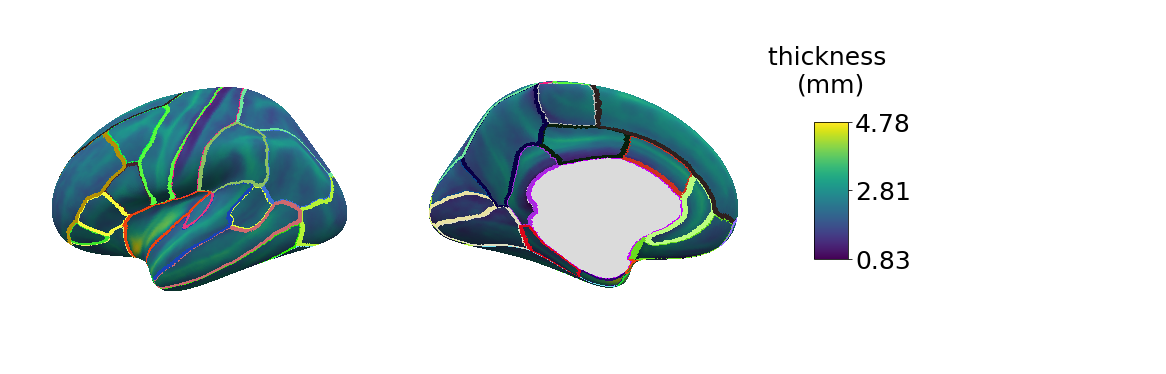

In [4]:
plot_surf(vertices, faces, overlay, rotate=[90,270], filename='demo_plot.png',
          vmax = np.max(overlay[cortex]),vmin=np.min(overlay[cortex]),mask=mask,
          pvals=np.ones_like(overlay), cmap_label='thickness \n(mm)',
          parcel=atlas
         )